<a href="https://colab.research.google.com/github/Tristaaaa/Object-Recognition-in-Deep-Learning/blob/master/%E3%80%8C0000000_4_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 4: CNN

## Description

Implement a Convolutional Neural Network (CNN) classifier to predict whether a given icon image is the real / fake. Where the fake images were generated by TAs with a neural network.

- You are not required to use Colab in this assignment, but you have to **submit your source code**.

## Dataset

- https://lab.djosix.com/icons.zip
- 64x64 RGB jpg images


```
real/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
fake/           (10000 images)
    0000.jpg
    0001.jpg
    ...
    9999.jpg
unknown/        (5350 images, testing set)
    0000.jpg
    0001.jpg
    ...
    5349.jpg
```

- Training set
  - 20000 icons in `real/` and `fake/`
  - You should predict 1 for icons in `real/` and 0 for icons in `fake/`
- Testing set:
  - 5350 icons in `unknown/`
  - Your score depends on the **accuracy** on this testing set,  
    so the prediction of each icon in `unknown/` should be submitted (totally 5350 predictions, see below).


## Submission

Please upload **2 files** to E3. (`XXXXXXX` is your student ID)

1. **`XXXXXXX_4_result.json`**  
  This file contains your model prediction for the testing set.  
  You must generate this file with the function called `save_predictions()`.
2. **`XXXXXXX_4_source.zip`**  
  Zip your source code into this archive.


## Hints

- **Deep Learning Libraries**: You can use any deep learning frameworks (PyTorch, TensorFlow, ...).
- **How to implement**: There are many CNN examples for beginners on the internet, e.g. official websites of the above libraries, play with them and their model architectures to abtain high accuracy on testing set.
- **GPU/TPU**: Colab provides free TPU/GPU for training speedup, please refer to [this page in `pytut.pdf` on E3](https://i.imgur.com/VsrUh7I.png).


In [50]:
!wget https://lab.djosix.com/icons.zip 

--2021-06-24 07:04:39--  https://lab.djosix.com/icons.zip
Resolving lab.djosix.com (lab.djosix.com)... 140.113.210.21
Connecting to lab.djosix.com (lab.djosix.com)|140.113.210.21|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32258271 (31M) [application/zip]
Saving to: ‘icons.zip.1’

icons.zip.1         100%[===================>]  30.76M  9.95MB/s    in 3.1s    

2021-06-24 07:04:43 (9.95 MB/s) - ‘icons.zip.1’ saved [32258271/32258271]



In [51]:
import os
import zipfile

###創資料夾
###/tmp/data testdata/real: fake: 8750 traindata/unknown: 5350
###/tmp/data/testdata/unknown real: 1250 fake:1250

#將下載的資料解壓縮至/tmp

#os.mkdir('/tmp/train/')
local_zip = 'icons.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/train/')
zip_ref.close()

In [2]:
import os
import glob
#在tmp底下創一個testdata把unknown移到tmp/testdata/下
unknown_dir = '/tmp/test/unknown'

#取得資料集路徑
train_dir = '/tmp/train'
test_dir = '/tmp/test'
import shutil

#fake_dir = os.path.join(base_dir, 'fake')
#real_dir = os.path.join(base_dir, 'real')
#unknown_dir = os.path.join(base_dir, 'unknown')

#fake_data = os.listdir(fake_dir) # 取得訓練用所有fake圖片
#real_data = os.listdir(real_dir) # 取得訓練用所有real圖片
#unknown_data = os.listdir(unknown_dir) #test

train_image_list = glob.glob(os.path.join(train_dir, '*/*.jpg'))
test_image_list = glob.glob(os.path.join(test_dir, '*/*.jpg'))

print(len(train_image_list))
print(len(test_image_list))


#shutil.rmtree('/unknown_dir')

20000
5350


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

split into train and validation


In [4]:
img_height = 64
img_width = 64

In [5]:
from keras.preprocessing.image import ImageDataGenerator


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=168,
  image_size=(img_height, img_width),
  batch_size=32)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=168,
  image_size=(img_height, img_width),
  batch_size=32)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['fake', 'real']


build model

In [21]:
from tensorflow.keras.models import Sequential
num_classes = 2

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

In [22]:
model.compile(optimizer='adam',
              #loss=keras.losses.BinaryCrossentropy(from_logits=True)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 64, 64, 3)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)         

In [24]:
epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
500/500 [==============================] - 86s 171ms/step - loss: 0.6655 - accuracy: 0.5981 - val_loss: 0.6344 - val_accuracy: 0.6532
Epoch 2/5
500/500 [==============================] - 86s 172ms/step - loss: 0.5975 - accuracy: 0.6803 - val_loss: 0.5870 - val_accuracy: 0.6945
Epoch 3/5
500/500 [==============================] - 85s 170ms/step - loss: 0.5730 - accuracy: 0.7011 - val_loss: 0.6206 - val_accuracy: 0.6570
Epoch 4/5
500/500 [==============================] - 85s 170ms/step - loss: 0.5481 - accuracy: 0.7220 - val_loss: 0.5508 - val_accuracy: 0.7185
Epoch 5/5
500/500 [==============================] - 85s 169ms/step - loss: 0.5091 - accuracy: 0.7512 - val_loss: 0.4781 - val_accuracy: 0.7730


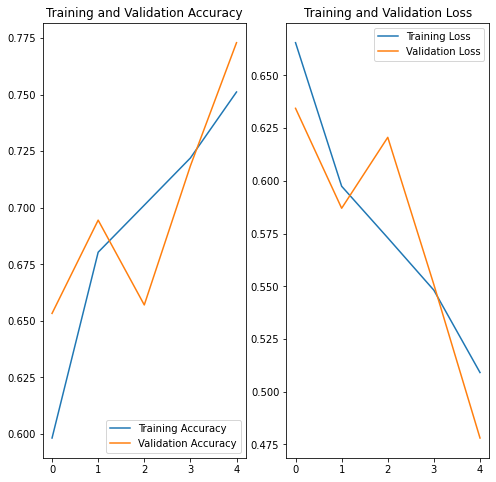

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Include this in your code to generate result file

In [43]:
import os
import pathlib

#prediction
test_image = '/tmp/test/unknown'
all_test_dir = pathlib.Path(test_image).glob('**/*.jpg')
sorted_test = sorted(all_test_dir)

result = []


for i in sorted_test:
  img = tf.keras.preprocessing.image.load_img(
      i, target_size = (64, 64)
  )
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  if class_names[np.argmax(score)] == 'fake':
    result.append(0)
  else:
    result.append(1)


In [47]:
print(result[5349])

1


In [ ]:
import json

def save_predictions(student_id, predictions):
  # Please use this function to generate 'XXXXXXX_4_result.json'
  # `predictions` is a list of int (0 or 1; fake=0 and real=1)
  # For example, `predictions[0]` is the prediction given "unknown/0000.jpg".
  # it will be 1 if your model think it is real, else 0 (fake).

  assert isinstance(student_id, str)
  assert isinstance(predictions, list)
  assert len(predictions) == 5350

  for y in predictions:
    assert y in (0, 1)

  with open('{}_4_result.json'.format(student_id), 'w') as f:
    json.dump(predictions, f)
